I have implemented the "Market analysis and profit prediction" using python Libraries. call some libraries. I have used 'Linear Regression' Algorithom

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
df = files.upload()

Saving online.csv to online.csv


*Import DataSet*

Data from kaggle = https://www.kaggle.com/datasets/rahuljoysoyal/onlinecsv?resource=download

In [ ]:
df = pd.read_csv('online.csv')

**Show** Data

In [ ]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of
mixed data types.

In [ ]:
df.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Count *information* (Dtype, attribute)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The function dataframe. isnull(). sum(). sum() returns the number of missing values in the data set.

In [ ]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

**df.corr():**

Pandas df.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. Use corr() function to find the correlation among the columns in the dataframe using ‘Outcome’ method. Now use corr() function to find the correlation among the columns.

*Heatmap:*

Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function.


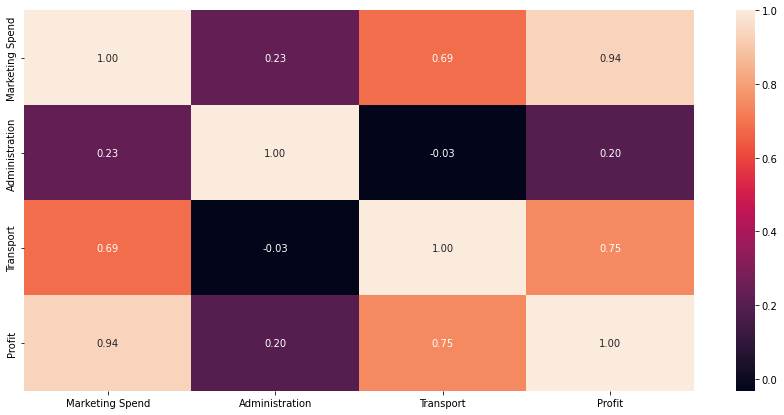

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')

To see Dependent and independent variable

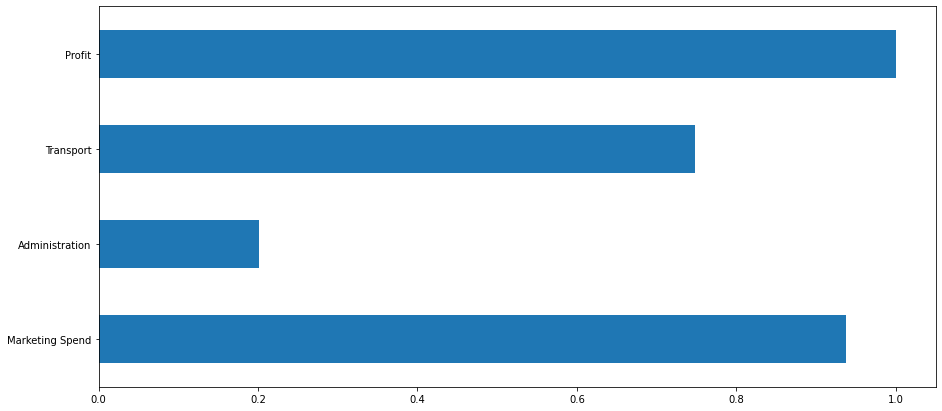

In [ ]:
plt.figure(figsize=(15,7))
df.corr()['Profit'].plot(kind='barh')

To see how Profit Depend on Marketing spend

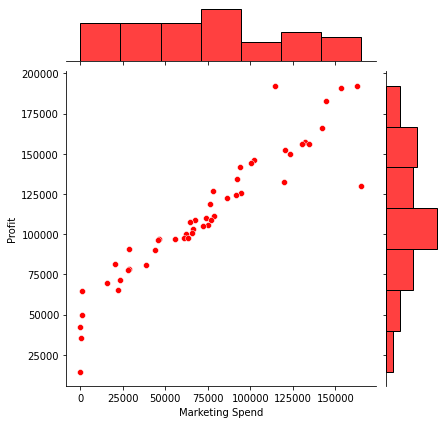

In [ ]:
sns.jointplot(x='Marketing Spend',y='Profit', data=df, color ='Red')

To see how Profit Depend on Administration

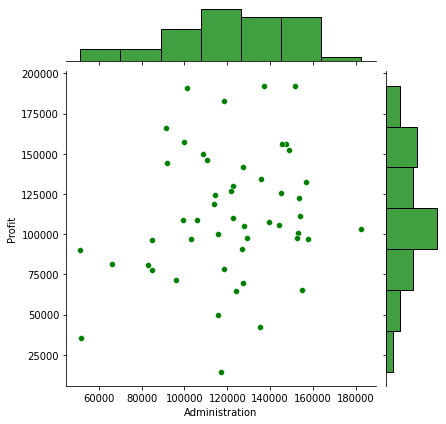

In [ ]:
sns.jointplot(x='Administration',y='Profit', data=df, color ='Green')

To see how Profit Depend on Transport

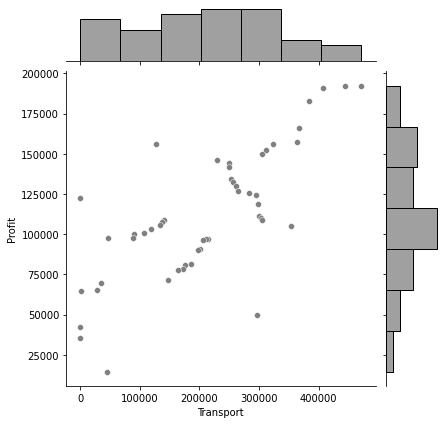

In [ ]:
sns.jointplot(x='Transport',y='Profit', data=df, color ='Gray')

To see how Profit Depend on Area

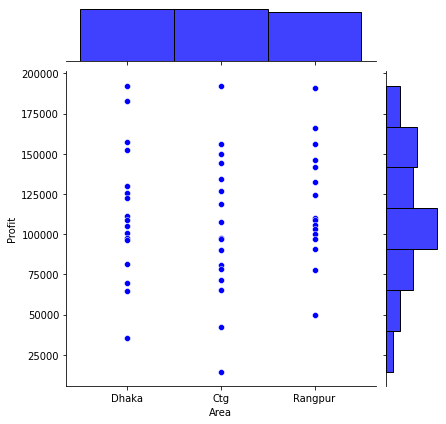

In [ ]:
sns.jointplot(x='Area',y='Profit', data=df, color ='Blue')

***Encoding the Area variable***

Models only work with numerical values. For this reason, it is necessary to convert the categorical values of the features into numerical ones, So the machine can learn from those data and gives the right model. This process of converting categorical data into numerical data is called Encoding.

In [ ]:
lab = LabelEncoder()
lab.fit_transform(df['Area'])

array([1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 0])

*Count Area *

In [ ]:
df['Area'].value_counts()

Dhaka      17
Ctg        17
Rangpur    16
Name: Area, dtype: int64

In [ ]:
df['Area']=lab.fit_transform(df['Area'])

In [ ]:
df['Area'].value_counts()

1    17
0    17
2    16
Name: Area, dtype: int64

*Show Data*

In [ ]:
df.head(9)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,1,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,1,152211.77


***Extracting independent and dependent variable***

The independent variable is the cause. Its value is independent of other variables in our study. Independent is = X
The dependent variable is the effect. Its value depends on changes in the independent variable. Dependent is = Y

In [ ]:
x = df.drop(['Profit'], axis=1)
y = df['Profit']

Show *Independent* X data

In [ ]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,2


Splitting the dataset into training and test set. Noted that: 80% of Data is picked for training and 20% of Data is picked for testing. those data are selected randomly.

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2, random_state=2)

show ytest data

In [ ]:
ytest

36     90708.19
47     42559.73
28    103282.38
9     149759.96
13    134307.35
0     192261.83
44     65200.33
46     49490.75
39     81005.76
23    108733.99
Name: Profit, dtype: float64

**Run Linear Regression algorithm and store in variable**

In [ ]:
reg=LinearRegression()

**Fitted and trained libraries to get the best scores.**

In [ ]:
reg.fit(xtrain,ytrain)

LinearRegression()

Show score of Linear Regression

In [ ]:
reg.score(xtest,ytest)

0.8995624114010251

To See Final Prediction

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Marketing = (input('Input Marketing Spend:'))
Administration = (input('Input Administration:'))
Transport = (input('Input Transport:'))
Area = (input('Input Area:'))
sample = np.array([Marketing, Administration, Transport, Area])
pred = reg.predict([sample])
if pred >= 0:
    print('Prediction Successfully completed, Our Profit is :', pred)
else:
    print('Data is not correct')

Input Marketing Spend:145658
Input Administration:140258
Input Transport:156123
Input Area:2
Prediction Successfully completed, Our Profit is : [158718.38327672]


In [ ]:
Thank you so much